In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/content/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/store_cities.csv
/content/Store costs.xlsx
/content/sales2019.csv
/content/producthierarchy.csv
/content/.config/.last_opt_in_prompt.yaml
/content/.config/.last_survey_prompt.yaml
/content/.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
/content/.config/active_config
/content/.config/gce
/content/.config/.last_update_check.json
/content/.config/default_configs.db
/content/.config/config_sentinel
/content/.config/configurations/config_default
/content/.config/logs/2025.01.29/14.18.40.249312.log
/content/.config/logs/2025.01.29/14.18.20.863243.log
/content/.config/logs/2025.01.29/14.18.30.956825.log
/content/.config/logs/2025.01.29/14.17.59.878870.log
/content/.config/logs/2025.01.29/14.18.29.534096.log
/content/.config/logs/2025.01.29/14.18.39.616542.log
/content/sample_data/README.md
/content/sample_data/anscombe.json
/content/sample_data/mnist_train_small.csv
/content/sample_data/california_housing_test.csv
/content/sample_data/mnist_test.csv
/content/s

In [2]:
os.listdir('/content/')

['.config',
 'store_cities.csv',
 'Store costs.xlsx',
 'sales2019.csv',
 'producthierarchy.csv',
 'sample_data']

## **Read Data**

In [3]:
dim_StoreCosts=pd.read_excel('/content/Store costs.xlsx')
dim_StoreCosts.head()

,store_id,building-costs,land and devolopment costs,Other related costs
0,S0091,3467959.0,1180964,421335
1,S0012,2205562.0,744172,316866
2,S0045,498766.0,170288,56093
3,S0032,7750009.0,2585892,1216210
4,S0027,1338071.0,444113,191515


In [4]:
dim_Product=pd.read_csv('/content/producthierarchy.csv')
dim_Product.head()

,product_id,product (brand),type,length x depth x width (in cm),category || sub_category
0,P0000,\tserum\t (Livon),Indian & Exotic Herbs,5 x 20 x 12,Fruits & Vegetables || Herbs & Seasonings
1,P0001,hand wash -\t moisture Shield (Savlon),Hair Oil & Serum,13.5 x 22 x 20,Beauty & Hygiene || Hair Care
2,P0002,good \t\tday butter Cookies (Britannia),Hand Wash & Sanitizers,22 x 40 x 22,Beauty & Hygiene || Bath & Hand Wash
3,P0004,Happy \t\tHappy Choco-Chip Cookies (Parle),Cookies,2 x 13 x 4,Snacks & Branded Foods || Biscuits & Cookies
4,P0005,50-50 Timepass salted biscuits (Britannia),Glucose & Milk Biscuits,16 x 30 x 16,Snacks & Branded Foods || Biscuits & Cookies


In [5]:
dim_StoreCities = pd.read_csv('/content/store_cities.csv')
dim_StoreCities.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 93: invalid start byte

In [6]:
try:
    dim_StoreCities = pd.read_csv('/content/store_cities.csv', encoding='latin-1')
    print(dim_StoreCities.head())
except UnicodeDecodeError:
    print("Error: Unable to decode the file with 'latin-1'. Trying a different encoding...")
    dim_StoreCities = pd.read_csv('/content/store_cities.csv', encoding='cp1252')
    print(dim_StoreCities.head())

  store_id storetype_id store_szie city_id  \
0    S0091         ST04      19 m²    C013   
1    S0012         ST04      28 m²    C005   
2    S0045         ST04      17 qm    C008   
3    S0032         ST03      14 m²    C019   
4    S0027         ST04      24 qm    C022   

                    state - state abr - city           lat / long  
0  AR - Arkansas - Hot Springs National Park   34.5137 / -92.9685  
1                    TX - Texas - Huntsville   30.7813 / -95.5953  
2            NC - North Carolina - Asheville   35.6004 / -82.4918  
3              CA - California - Los Angeles  33.7866 / -118.2987  
4                     TX - Texas - Texarkana   33.3934 / -94.3404  


In [7]:
fact_Sales2019=pd.read_csv('/content/sales2019.csv')
fact_Sales2019.head()

,order_id,product_id,store_id,order_date,order_date_2,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,delivery_date_format1,delivery_date_format2
0,40911,P0392,S0001,1/1/2019,1-Jan-19,0.0,0.00,3.0,124.99,PR14,NaN,PR03,NaN,NaN,1/3/2019,3/1/2019
1,40912,P0018,S0071,1/1/2019,1-Jan-19,0.0,0.00,4.0,3.25,PR03,verylow,PR03,NaN,NaN,1/3/2019,3/1/2019
2,40913,P0565,S0096,1/1/2019,1-Jan-19,0.0,0.00,12.0,4.25,PR14,NaN,PR03,NaN,NaN,1/4/2019,4/1/2019
3,40914,P0372,S0121,1/1/2019,1-Jan-19,0.0,0.00,24.0,4.90,PR14,NaN,PR03,NaN,NaN,1/3/2019,3/1/2019
4,40915,P0543,S0101,1/1/2019,1-Jan-19,2.0,7.41,11.0,4.00,PR14,NaN,PR03,NaN,NaN,1/5/2019,5/1/2019


# **Data Cleaning**

In [8]:
dim_Product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   product_id                      699 non-null    object
 1   product (brand)                 699 non-null    object
 2   type                            699 non-null    object
 3   length x depth x width (in cm)  683 non-null    object
 4   category || sub_category        699 non-null    object
dtypes: object(5)
memory usage: 27.4+ KB


In [9]:
dim_StoreCities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   store_id                  144 non-null    object
 1   storetype_id              144 non-null    object
 2   store_szie                144 non-null    object
 3   city_id                   144 non-null    object
 4   state - state abr - city  144 non-null    object
 5   lat / long                144 non-null    object
dtypes: object(6)
memory usage: 6.9+ KB


In [10]:
dim_StoreCosts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   store_id                    144 non-null    object 
 1   building-costs              144 non-null    float64
 2   land and devolopment costs  144 non-null    int64  
 3   Other related costs         144 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 4.6+ KB


In [11]:
fact_Sales2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47239 entries, 0 to 47238
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               47239 non-null  int64  
 1   product_id             47239 non-null  object 
 2   store_id               47239 non-null  object 
 3   order_date             47239 non-null  object 
 4   order_date_2           47239 non-null  object 
 5   sales                  39109 non-null  float64
 6   revenue                39109 non-null  float64
 7   stock                  39109 non-null  float64
 8   price                  46883 non-null  float64
 9   promo_type_1           47239 non-null  object 
 10  promo_bin_1            7981 non-null   object 
 11  promo_type_2           47239 non-null  object 
 12  promo_bin_2            380 non-null    object 
 13  promo_discount_2       380 non-null    float64
 14  delivery_date_format1  47239 non-null  object 
 15  de

In [12]:
d_null=dim_Product.isnull().sum()
d_null

,0
product_id,0
product (brand),0
type,0
length x depth x width (in cm),16
category || sub_category,0


In [13]:
d1_null=dim_StoreCities.isnull().sum()
d1_null

,0
store_id,0
storetype_id,0
store_szie,0
city_id,0
state - state abr - city,0
lat / long,0


In [14]:
d2_null=dim_StoreCosts.isnull().sum()
d2_null

,0
store_id,0
building-costs,0
land and devolopment costs,0
Other related costs,0


In [15]:
d3_null=fact_Sales2019.isnull().sum()
d3_null

,0
order_id,0
product_id,0
store_id,0
order_date,0
order_date_2,0
sales,8130
revenue,8130
stock,8130
price,356
promo_type_1,0


In [16]:
dim_Product.duplicated().sum()

0

In [17]:
dim_StoreCities.duplicated().sum()

0

In [18]:
dim_StoreCosts.duplicated().sum()

0

In [19]:
fact_Sales2019.duplicated().sum()

0

In [20]:
dim_Product.columns

Index(['product_id', 'product (brand)', 'type',
       'length x depth x width (in cm)', 'category || sub_category'],
      dtype='object')

In [21]:
dim_Product[['product_name', 'brand']] = dim_Product['product (brand)'].str.split('(', n=1, expand=True)
dim_Product['brand'] = dim_Product['brand'].str.replace(')', '', regex=False).str.strip()
dim_Product[['length(cm)', 'depth(cm)', 'width(cm)']] = dim_Product['length x depth x width (in cm)'].str.split('x', expand=True)
dim_Product[['category','sub_category']] = dim_Product['category || sub_category'].str.split('|', n=1, expand=True)
dim_Product['sub_category'] = dim_Product['sub_category'].str.replace('|', '', regex=False).str.strip()
dim_Product.drop(columns=['product (brand)', 'length x depth x width (in cm)', 'category || sub_category'], inplace=True)
dim_Product.head()

,product_id,type,product_name,brand,length(cm),depth(cm),width(cm),category,sub_category
0,P0000,Indian & Exotic Herbs,\tserum\t,Livon,5,20,12,Fruits & Vegetables,Herbs & Seasonings
1,P0001,Hair Oil & Serum,hand wash -\t moisture Shield,Savlon,13.5,22,20,Beauty & Hygiene,Hair Care
2,P0002,Hand Wash & Sanitizers,good \t\tday butter Cookies,Britannia,22,40,22,Beauty & Hygiene,Bath & Hand Wash
3,P0004,Cookies,Happy \t\tHappy Choco-Chip Cookies,Parle,2,13,4,Snacks & Branded Foods,Biscuits & Cookies
4,P0005,Glucose & Milk Biscuits,50-50 Timepass salted biscuits,Britannia,16,30,16,Snacks & Branded Foods,Biscuits & Cookies


In [22]:
dim_Product[['length(cm)', 'depth(cm)', 'width(cm)']] = dim_Product[['length(cm)', 'depth(cm)', 'width(cm)']].apply(pd.to_numeric, errors='coerce')
dim_Product[['length(cm)', 'depth(cm)', 'width(cm)']] = dim_Product[['length(cm)', 'depth(cm)', 'width(cm)']].fillna(0)
dim_Product['volume(cm^3)'] = dim_Product.apply(lambda x: x['length(cm)'] * x['depth(cm)'] * x['width(cm)'], axis=1)
dim_Product.head()

,product_id,type,product_name,brand,length(cm),depth(cm),width(cm),category,sub_category,volume(cm^3)
0,P0000,Indian & Exotic Herbs,\tserum\t,Livon,5.0,20.0,12.0,Fruits & Vegetables,Herbs & Seasonings,1200.0
1,P0001,Hair Oil & Serum,hand wash -\t moisture Shield,Savlon,13.5,22.0,20.0,Beauty & Hygiene,Hair Care,5940.0
2,P0002,Hand Wash & Sanitizers,good \t\tday butter Cookies,Britannia,22.0,40.0,22.0,Beauty & Hygiene,Bath & Hand Wash,19360.0
3,P0004,Cookies,Happy \t\tHappy Choco-Chip Cookies,Parle,2.0,13.0,4.0,Snacks & Branded Foods,Biscuits & Cookies,104.0
4,P0005,Glucose & Milk Biscuits,50-50 Timepass salted biscuits,Britannia,16.0,30.0,16.0,Snacks & Branded Foods,Biscuits & Cookies,7680.0


In [23]:
d_null=dim_Product.isnull().sum()
d_null

,0
product_id,0
type,0
product_name,0
brand,0
length(cm),0
depth(cm),0
width(cm),0
category,0
sub_category,0
volume(cm^3),0


In [24]:

dim_StoreCities[['store_size(m^2)', 'store_size_unit']] = dim_StoreCities['store_szie'].str.split(' ', n=1, expand=True)
dim_StoreCities.drop(columns=['store_szie','store_size_unit'], inplace=True)
dim_StoreCities[['latitude', 'longitude']] = dim_StoreCities['lat / long'].str.split('/', n=1, expand=True)
dim_StoreCities.drop(columns=['lat / long'], inplace=True)
dim_StoreCities[['state','state abr','city']] = dim_StoreCities['state - state abr - city'].str.split('-', n=2, expand=True)
dim_StoreCities.drop(columns=['state - state abr - city'], inplace=True)
dim_StoreCities.head()

,store_id,storetype_id,city_id,store_size(m^2),latitude,longitude,state,state abr,city
0,S0091,ST04,C013,19,34.5137,-92.9685,AR,Arkansas,Hot Springs National Park
1,S0012,ST04,C005,28,30.7813,-95.5953,TX,Texas,Huntsville
2,S0045,ST04,C008,17,35.6004,-82.4918,NC,North Carolina,Asheville
3,S0032,ST03,C019,14,33.7866,-118.2987,CA,California,Los Angeles
4,S0027,ST04,C022,24,33.3934,-94.3404,TX,Texas,Texarkana


In [25]:
fact_Sales2019.columns

Index(['order_id', 'product_id', 'store_id', 'order_date', 'order_date_2',
       'sales', 'revenue', 'stock', 'price', 'promo_type_1', 'promo_bin_1',
       'promo_type_2', 'promo_bin_2', 'promo_discount_2',
       'delivery_date_format1', 'delivery_date_format2'],
      dtype='object')

In [26]:
fact_Sales2019.drop(columns=['order_date_2','delivery_date_format2'], inplace=True)
fact_Sales2019.head()

,order_id,product_id,store_id,order_date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,delivery_date_format1
0,40911,P0392,S0001,1/1/2019,0.0,0.00,3.0,124.99,PR14,NaN,PR03,NaN,NaN,1/3/2019
1,40912,P0018,S0071,1/1/2019,0.0,0.00,4.0,3.25,PR03,verylow,PR03,NaN,NaN,1/3/2019
2,40913,P0565,S0096,1/1/2019,0.0,0.00,12.0,4.25,PR14,NaN,PR03,NaN,NaN,1/4/2019
3,40914,P0372,S0121,1/1/2019,0.0,0.00,24.0,4.90,PR14,NaN,PR03,NaN,NaN,1/3/2019
4,40915,P0543,S0101,1/1/2019,2.0,7.41,11.0,4.00,PR14,NaN,PR03,NaN,NaN,1/5/2019


In [27]:
fact_Sales2019['sales']=fact_Sales2019['sales'].fillna(0)
fact_Sales2019['revenue']=fact_Sales2019['revenue'].fillna(0)
fact_Sales2019['stock']=fact_Sales2019['stock'].fillna(0)

In [28]:
d3_null=fact_Sales2019.isnull().sum()
d3_null

,0
order_id,0
product_id,0
store_id,0
order_date,0
sales,0
revenue,0
stock,0
price,356
promo_type_1,0
promo_bin_1,39258


In [29]:
fact_Sales2019['promo_bin_1']=fact_Sales2019['promo_bin_1'].fillna("unknown")
fact_Sales2019['promo_bin_2']=fact_Sales2019['promo_bin_2'].fillna("unknown")
fact_Sales2019['promo_discount_2']=fact_Sales2019['promo_discount_2'].fillna(0)
fact_Sales2019.head()

,order_id,product_id,store_id,order_date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,delivery_date_format1
0,40911,P0392,S0001,1/1/2019,0.0,0.00,3.0,124.99,PR14,unknown,PR03,unknown,0.0,1/3/2019
1,40912,P0018,S0071,1/1/2019,0.0,0.00,4.0,3.25,PR03,verylow,PR03,unknown,0.0,1/3/2019
2,40913,P0565,S0096,1/1/2019,0.0,0.00,12.0,4.25,PR14,unknown,PR03,unknown,0.0,1/4/2019
3,40914,P0372,S0121,1/1/2019,0.0,0.00,24.0,4.90,PR14,unknown,PR03,unknown,0.0,1/3/2019
4,40915,P0543,S0101,1/1/2019,2.0,7.41,11.0,4.00,PR14,unknown,PR03,unknown,0.0,1/5/2019


In [30]:
fact_Sales2019.dropna(subset=['price'], inplace=True)
fact_Sales2019.reset_index(drop=True, inplace=True)
fact_Sales2019.head()

,order_id,product_id,store_id,order_date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,delivery_date_format1
0,40911,P0392,S0001,1/1/2019,0.0,0.00,3.0,124.99,PR14,unknown,PR03,unknown,0.0,1/3/2019
1,40912,P0018,S0071,1/1/2019,0.0,0.00,4.0,3.25,PR03,verylow,PR03,unknown,0.0,1/3/2019
2,40913,P0565,S0096,1/1/2019,0.0,0.00,12.0,4.25,PR14,unknown,PR03,unknown,0.0,1/4/2019
3,40914,P0372,S0121,1/1/2019,0.0,0.00,24.0,4.90,PR14,unknown,PR03,unknown,0.0,1/3/2019
4,40915,P0543,S0101,1/1/2019,2.0,7.41,11.0,4.00,PR14,unknown,PR03,unknown,0.0,1/5/2019


In [31]:
d3_null=fact_Sales2019.isnull().sum()
d3_null

,0
order_id,0
product_id,0
store_id,0
order_date,0
sales,0
revenue,0
stock,0
price,0
promo_type_1,0
promo_bin_1,0


In [32]:
sales_with_costs = pd.merge(fact_Sales2019, dim_StoreCosts, on='store_id', how='outer')
sales_with_costs_cities = pd.merge(sales_with_costs, dim_StoreCities, on='store_id', how='outer')
sales = pd.merge(sales_with_costs_cities, dim_Product, on='product_id', how='outer')

sales.head()

,order_id,product_id,store_id,order_date,sales,revenue,stock,price,promo_type_1,promo_bin_1,...,city,type,product_name,brand,length(cm),depth(cm),width(cm),category,sub_category,volume(cm^3)
0,NaN,P0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Indian & Exotic Herbs,\tserum\t,Livon,5.0,20.0,12.0,Fruits & Vegetables,Herbs & Seasonings,1200.0
1,49652.0,P0001,S0020,5/15/2019,0.0,0.0,13.0,10.95,PR14,unknown,...,El Paso,Hair Oil & Serum,hand wash -\t moisture Shield,Savlon,13.5,22.0,20.0,Beauty & Hygiene,Hair Care,5940.0
2,61434.0,P0001,S0020,11/3/2019,0.0,0.0,0.0,10.95,PR14,unknown,...,El Paso,Hair Oil & Serum,hand wash -\t moisture Shield,Savlon,13.5,22.0,20.0,Beauty & Hygiene,Hair Care,5940.0
3,72447.0,P0001,S0020,5/15/2019,0.0,0.0,13.0,10.95,PR14,unknown,...,El Paso,Hair Oil & Serum,hand wash -\t moisture Shield,Savlon,13.5,22.0,20.0,Beauty & Hygiene,Hair Care,5940.0
4,84229.0,P0001,S0020,11/3/2019,0.0,0.0,0.0,10.95,PR14,unknown,...,El Paso,Hair Oil & Serum,hand wash -\t moisture Shield,Savlon,13.5,22.0,20.0,Beauty & Hygiene,Hair Care,5940.0


In [33]:
total_sales =sales['sales'].sum()
total_sales

14722.804

In [34]:
total_revenue = sales['revenue'].sum()
total_revenue

93357.31

In [35]:
Max_sales=sales['sales'].max()
Max_sales

82.0

In [36]:
min_sales=sales['sales'].min()
min_sales

0.0

In [37]:
max_revenue=sales['revenue'].max()
max_revenue

2497.96

In [38]:
min_revenue=sales['revenue'].min()
min_revenue

0.0

In [39]:
sales["order_date"] = pd.to_datetime(sales["order_date"])
sales["delivery_date_format1"] = pd.to_datetime(sales["delivery_date_format1"])

In [40]:
sales['Quantity_Sold']=sales['revenue']/sales['price']
sales["delivery_delay"] = (sales["delivery_date_format1"] - sales["order_date"]).dt.days
sales.head()

,order_id,product_id,store_id,order_date,sales,revenue,stock,price,promo_type_1,promo_bin_1,...,product_name,brand,length(cm),depth(cm),width(cm),category,sub_category,volume(cm^3),Quantity_Sold,delivery_delay
0,NaN,P0000,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,\tserum\t,Livon,5.0,20.0,12.0,Fruits & Vegetables,Herbs & Seasonings,1200.0,NaN,NaN
1,49652.0,P0001,S0020,2019-05-15,0.0,0.0,13.0,10.95,PR14,unknown,...,hand wash -\t moisture Shield,Savlon,13.5,22.0,20.0,Beauty & Hygiene,Hair Care,5940.0,0.0,3.0
2,61434.0,P0001,S0020,2019-11-03,0.0,0.0,0.0,10.95,PR14,unknown,...,hand wash -\t moisture Shield,Savlon,13.5,22.0,20.0,Beauty & Hygiene,Hair Care,5940.0,0.0,2.0
3,72447.0,P0001,S0020,2019-05-15,0.0,0.0,13.0,10.95,PR14,unknown,...,hand wash -\t moisture Shield,Savlon,13.5,22.0,20.0,Beauty & Hygiene,Hair Care,5940.0,0.0,3.0
4,84229.0,P0001,S0020,2019-11-03,0.0,0.0,0.0,10.95,PR14,unknown,...,hand wash -\t moisture Shield,Savlon,13.5,22.0,20.0,Beauty & Hygiene,Hair Care,5940.0,0.0,2.0


In [41]:
Avg_Revenue=sales['revenue'].mean()
Avg_Revenue

1.9912827677409721

In [42]:
Avg_sales=sales['sales'].mean()
Avg_sales

0.31403289038670734

In [43]:
total_discount = sales['promo_discount_2'].sum()
total_discount

9608.0

In [44]:
sales_without_discount = sales[sales["promo_discount_2"] == 0]["sales"].sum()
sales_without_discount

14662.804

In [45]:
sales_with_discount = sales[sales["promo_discount_2"] > 0]["sales"].sum()
sales_with_discount

60.0

In [46]:
Revenue_after_Discount = total_revenue - total_discount
Revenue_after_Discount

83749.31

In [47]:
Total_Sales_Quantity=sales['Quantity_Sold'].sum()
Total_Sales_Quantity

13336.70400911742

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
revenue_state = sales.groupby('state abr')['revenue'].sum().reset_index()
revenue_state = revenue_state.sort_values(by='revenue', ascending=False)
max_revenue_state = pd.DataFrame(revenue_state[:5])
max_revenue_state

,state abr,revenue
30,Texas,12423.83
26,Oklahoma,8780.88
1,Arizona,7391.87
8,Florida,7099.81
3,California,6958.26


Text(0, 0.5, 'Revenue')

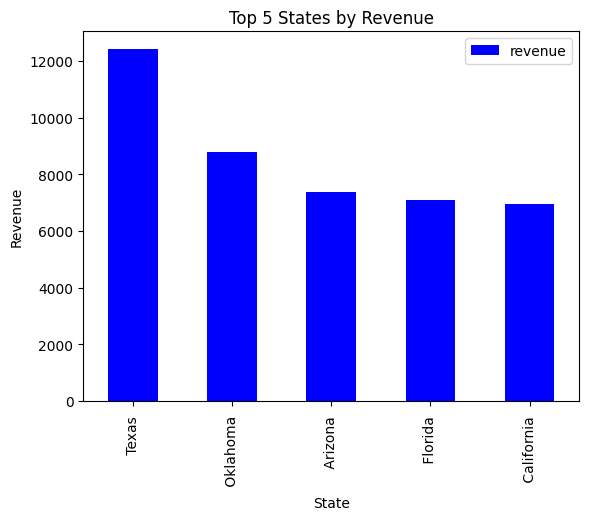

In [50]:
max_revenue_state.plot(kind='bar', x='state abr', y='revenue', color='blue')
plt.title('Top 5 States by Revenue')
plt.xlabel('State')
plt.ylabel('Revenue')

In [51]:
sales_city=sales.groupby('city')['sales'].sum().reset_index()
sales_city=sales_city.sort_values(by='sales',ascending=False)
max_sales_city=pd.DataFrame(sales_city[:5])
max_sales_city

,city,sales
61,Oklahoma City,1612.730
65,Phoenix,856.095
27,Des Moines,544.000
71,Saint Louis,533.376
84,Springfield,484.000


Text(0, 0.5, 'Sales')

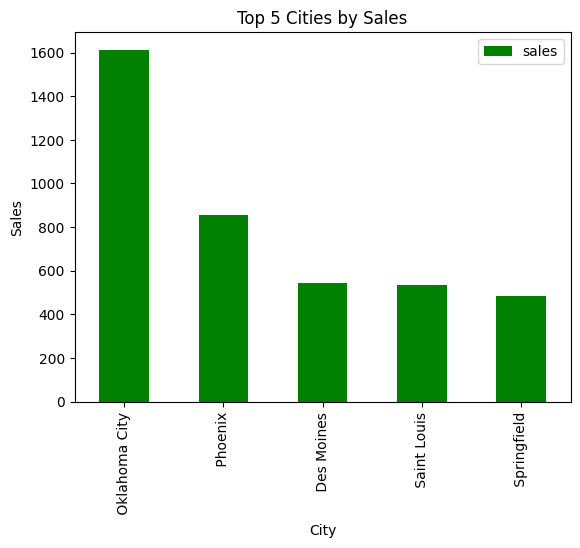

In [52]:
max_sales_city.plot(kind='bar',x='city',y='sales',color='green')
plt.title('Top 5 Cities by Sales')
plt.xlabel('City')
plt.ylabel('Sales')


In [53]:
delivery_delay_state = sales.groupby('state abr')['delivery_delay'].sum().reset_index()
delivery_delay_state = delivery_delay_state.sort_values(by='delivery_delay', ascending=False)
max_delivery_delay_state = pd.DataFrame(delivery_delay_state[:5])
max_delivery_delay_state

,state abr,delivery_delay
30,Texas,14347.0
3,California,12147.0
8,Florida,10876.0
25,Ohio,8915.0
26,Oklahoma,7803.0


Text(0, 0.5, 'Delivery Delay')

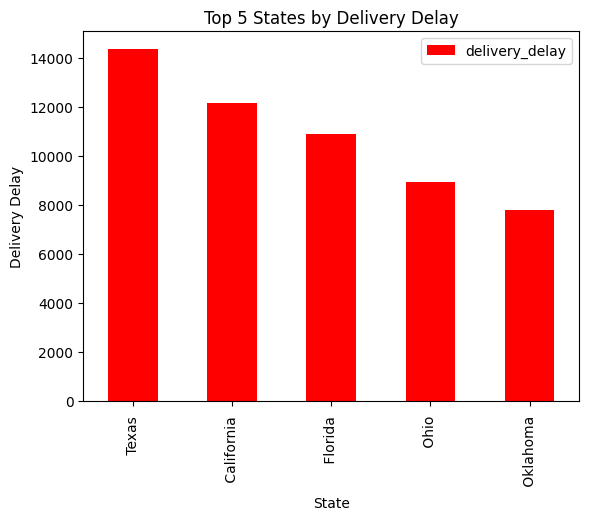

In [54]:
max_delivery_delay_state.plot(kind='bar', x='state abr', y='delivery_delay', color='red')
plt.title('Top 5 States by Delivery Delay')
plt.xlabel('State')
plt.ylabel('Delivery Delay')


In [55]:
sales['Quarter'] = sales['order_date'].dt.to_period('Q')
sales.head()

,order_id,product_id,store_id,order_date,sales,revenue,stock,price,promo_type_1,promo_bin_1,...,brand,length(cm),depth(cm),width(cm),category,sub_category,volume(cm^3),Quantity_Sold,delivery_delay,Quarter
0,NaN,P0000,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,Livon,5.0,20.0,12.0,Fruits & Vegetables,Herbs & Seasonings,1200.0,NaN,NaN,NaT
1,49652.0,P0001,S0020,2019-05-15,0.0,0.0,13.0,10.95,PR14,unknown,...,Savlon,13.5,22.0,20.0,Beauty & Hygiene,Hair Care,5940.0,0.0,3.0,2019Q2
2,61434.0,P0001,S0020,2019-11-03,0.0,0.0,0.0,10.95,PR14,unknown,...,Savlon,13.5,22.0,20.0,Beauty & Hygiene,Hair Care,5940.0,0.0,2.0,2019Q4
3,72447.0,P0001,S0020,2019-05-15,0.0,0.0,13.0,10.95,PR14,unknown,...,Savlon,13.5,22.0,20.0,Beauty & Hygiene,Hair Care,5940.0,0.0,3.0,2019Q2
4,84229.0,P0001,S0020,2019-11-03,0.0,0.0,0.0,10.95,PR14,unknown,...,Savlon,13.5,22.0,20.0,Beauty & Hygiene,Hair Care,5940.0,0.0,2.0,2019Q4


In [57]:
quarter_sales = sales.groupby('Quarter').agg({"sales": "sum", "revenue": "sum"}).reset_index()
quarter_sales["Quarter"] = quarter_sales["Quarter"].astype(str)
quarter_sales.sort_values("Quarter", inplace=True)
quarter_sales

,Quarter,sales,revenue
0,2019Q1,3497.756,17213.65
1,2019Q2,4031.722,24129.12
2,2019Q3,5716.326,43009.54
3,2019Q4,1477.000,9005.00


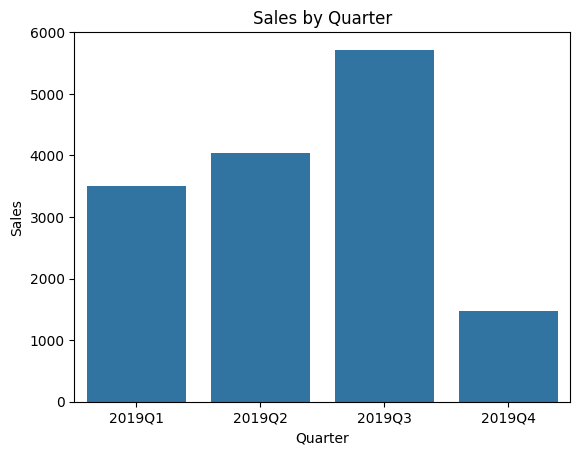

In [60]:
sns.barplot(x="Quarter", y="sales", data=quarter_sales)
plt.title("Sales by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Sales")
plt.show()

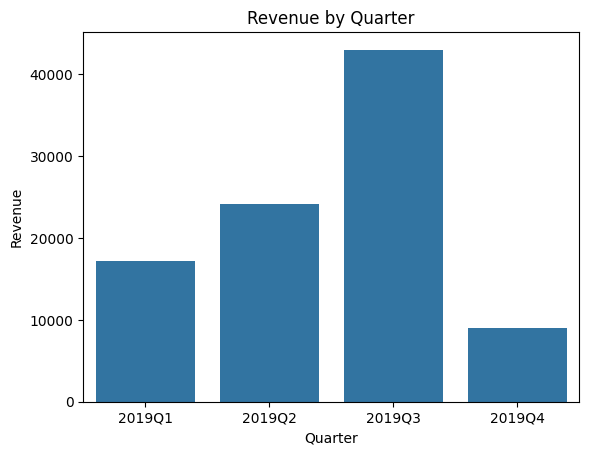

In [61]:
sns.barplot(x="Quarter", y="revenue", data=quarter_sales)
plt.title("Revenue by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Revenue")
plt.show()